In [269]:
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.operations import SymmOp
with MPRester ("pl21UGDCwMytgocW") as m:
    
    #Structure de bande du materiau avec MP
    bandstructure = m.get_bandstructure_by_material_id("mp-1018059")
    #Creation d'un objet facilitant le plot de strucutre de bande
    BSPLOT = BSPlotter(bandstructure)
    #Creation dictionnaire contenant ticks,energy,vbm,..
    DATA= BSPLOT.bs_plot_data()
    #Recuperation d'un dictionnaire contenant les distances et labels
    TICKS = DATA.get('ticks')

# 1) Bande interdite

In [270]:
#Recuperation de la bande interdite a partir de la structure de bande
BANDINT = bandstructure.get_band_gap()
print(BANDINT)

{'direct': True, 'energy': 0.05870000000000042, 'transition': '\\Gamma-\\Gamma'}


La bande interdite du matériau est dite directe, c'est à dire que le maximum de la bande valence est aligné avec le minimum de la bande de conduction. La largeur de la bande de valence vaut 0.05870 eV ce qui signifie que le matériau est un semiconducteur.

# 2) Dispersion dans la bande de valence et dans la bande de conduction

En analysant la structure de bande et les données, on peut déterminer que la dernière bande de valence possède la numéro 17 et que la première bande de conduction possède le numéro 18. Ces informations seront utiles pour la suite.

La direction dans laquelle la derniere bande de valence presente le plus de dispersion est M - K et possède une pente de: -2.887913510841957
La direction dans laquelle la derniere bande de valence presente le moins de dispersion est L - H et possède une pente de: 0.6662483659498417
La direction dans laquelle la premiere bande de conduction presente le plus de dispersion est M - K et possède une pente de: 2.1590800800416607
La direction dans laquelle la premiere bande de conduction presente le moins de dispersion est A - L et possède une pente de: 0.0555900001738284


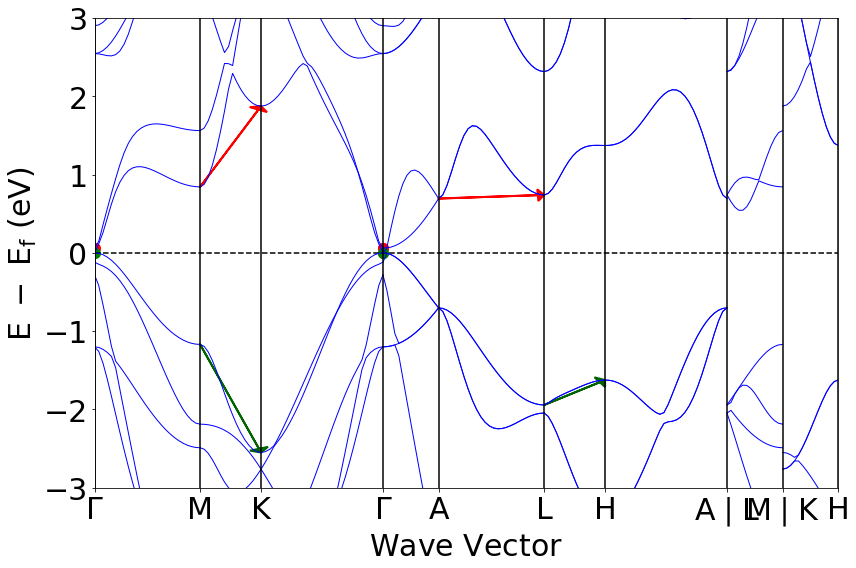

In [271]:
#Creation d'un vecteur contenant les largeurs des branches
LARG = []
for i in range (0,15):
    if (TICKS.get('distance')[i+1])-(TICKS.get('distance')[i]) != 0.0:
         LARG.append((TICKS.get('distance')[i+1])-(TICKS.get('distance')[i]))
    else:
        LARG
#Creation d'un vecteur contenant 
BRANCHE = []
for i in range (0,9):
    BRANCHE.append(DATA.get('energy')[i])
    
#Creation d'un vecteur contenant les pentes des branches pour la derniere 
#bande de valence et d'un vecteur contenant les valeurs absolues des ces pentes
PENTEVAL = []
ABSPENTEVAL = []
for i in range (0,9):
    x = len(BRANCHE[i].get('1')[17])-1
    PENTEVAL.append((((BRANCHE[i].get('1')[17][x])-(BRANCHE[i].get('1')[17][0]))/LARG[i]))
    ABSPENTEVAL.append(abs((((BRANCHE[i].get('1')[17][x])-(BRANCHE[i].get('1')[17][0]))/LARG[i])))
#Idem mais pour la bande de conduction
PENTECOND = []
ABSPENTECOND = []
for i in range (0,9):
    x = len(BRANCHE[i].get('1')[18])-1
    PENTECOND.append((((BRANCHE[i].get('1')[18][x])-(BRANCHE[i].get('1')[18][0]))/LARG[i]))
    ABSPENTECOND.append(abs((((BRANCHE[i].get('1')[18][x])-(BRANCHE[i].get('1')[18][0]))/LARG[i])))
#Fonction renvoyant l'abscisse, a = index
def INDEXx(a):
    l = 0
    for i in range (0,a):
        l = l + LARG[i]        
    return l  
#Fonction renvoyant l'ordonnee, a = index, b = numero de la bande
def INDEXy(a,b):
    return BRANCHE[a].get('1')[b][0]
#Calcul de l'index des pentes min et max les bandes de valence
INDEXMAXCOND = ABSPENTECOND.index(max(ABSPENTECOND))
INDEXMINCOND = ABSPENTECOND.index(min(ABSPENTECOND))
INDEXMAXVAL = ABSPENTEVAL.index(max(ABSPENTEVAL))
INDEXMINVAL = ABSPENTEVAL.index(min(ABSPENTEVAL))
#Affichage des resultats
print("La direction dans laquelle la derniere bande de valence presente le plus de dispersion est M - K et possède une pente de:",PENTEVAL[INDEXMAXVAL])
print("La direction dans laquelle la derniere bande de valence presente le moins de dispersion est L - H et possède une pente de:",PENTEVAL[INDEXMINVAL])
print("La direction dans laquelle la premiere bande de conduction presente le plus de dispersion est M - K et possède une pente de:",PENTECOND[INDEXMAXCOND])
print("La direction dans laquelle la premiere bande de conduction presente le moins de dispersion est A - L et possède une pente de:",PENTECOND[INDEXMINCOND]) 
#Creation du plot avec les fleches
BSPLOT.get_plot(vbm_cbm_marker=True,ylim=(-3, 3))
ax = plt.gca()
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")
plt.arrow(INDEXx(INDEXMAXCOND),INDEXy(INDEXMAXCOND,18),LARG[INDEXMAXCOND],LARG[INDEXMAXCOND]*PENTECOND[INDEXMAXCOND], head_width=0.15, head_length=0.05, linewidth=2, color='r', length_includes_head=True)
plt.arrow(INDEXx(INDEXMAXVAL),INDEXy(INDEXMAXVAL,17),LARG[INDEXMAXVAL],LARG[INDEXMAXVAL]*PENTEVAL[INDEXMAXVAL], head_width=0.15, head_length=0.05, linewidth=2, color='darkgreen', length_includes_head=True)
plt.arrow(INDEXx(INDEXMINCOND),INDEXy(INDEXMINCOND,18),LARG[INDEXMINCOND],LARG[INDEXMINCOND]*PENTECOND[INDEXMINCOND], head_width=0.15, head_length=0.05, linewidth=2, color='r', length_includes_head=True)
plt.arrow(INDEXx(INDEXMINVAL),INDEXy(INDEXMINVAL,17),LARG[INDEXMINVAL],LARG[INDEXMINVAL]*PENTEVAL[INDEXMINVAL], head_width=0.15, head_length=0.05, linewidth=2, color='darkgreen', length_includes_head=True)




# 3) Calcul des masses effectives

En supposant notre dispersion comme étant parabolique, on peut calculer la masse effective pour la dernière bande de valence ainsi que pour la première bande de conduction. Pour arriver à cela, il est nécessaire d'approximer nos courbes par deux paraboles. L'équation de la masse effective s'écrit comme suit: 

<img src="MASSEEFFECTIVE.png" width="150" />

La masse effective de la dernière bande de valence vaut: -5.878348638763525e-31 kg
La masse effective de la première bande de conduction vaut: 9.500788507375192e-32 kg


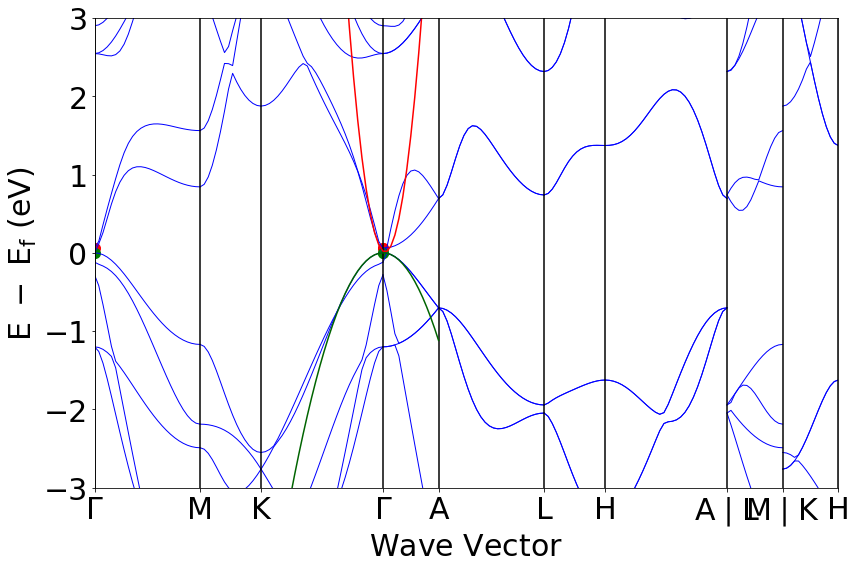

In [272]:
#Fonction creant une parabole
def f(a,b):
    return a[0]*b**2 +a[1]*b +a[2]
#Abscisses des branches 3 et 4 ou se trouvent le max de la bande de valence 
#et le min de la bande de conduction    
ABSCG = DATA.get('distances')[2] 
ABSCD = DATA.get('distances')[3]
#Ordonnees pour la derniere bande de valence
ORDVALG = BRANCHE[2].get('1')[17]
ORDVALD = BRANCHE[3].get('1')[17]
#Ordonnees pour la premiere bande de conduction
ORDCONDG = BRANCHE[2].get('1')[18]
ORDCONDD = BRANCHE[3].get('1')[18]
#Approximation polynomiale du second degre en prenant trois points a droite et a gauche du max et du min
APPRMAX = np.polyfit(np.append(ABSCG[-3:],ABSCD[0:3]),np.append(ORDVALG[-3:],ORDVALD[0:3]),2)
APPRMIN = np.polyfit(np.append(ABSCG[-3:],ABSCD[0:3]),np.append(ORDCONDG[-3:],ORDCONDD[0:3]),2)
#Affichage de la structure de bande avec les approximations polynomiales
BSPLOT.get_plot(vbm_cbm_marker=True,ylim=(-3, 3))
plt.plot(np.append(ABSCG,ABSCD),f(APPRMAX,np.append(ABSCG,ABSCD)),color='darkgreen')
plt.plot(np.append(ABSCG,ABSCD),f(APPRMIN,np.append(ABSCG,ABSCD)),color='red')
#Calcul des masses effectives
MEVAL = (sc.hbar)**2/(APPRMAX[0]*2*sc.electron_volt*sc.angstrom*sc.angstrom)
MECOND = (sc.hbar)**2/(APPRMIN[0]*2*sc.electron_volt*sc.angstrom*sc.angstrom)
#Affichage des resultats
print("La masse effective de la dernière bande de valence vaut:",MEVAL,"kg" )
print("La masse effective de la première bande de conduction vaut:",MECOND,"kg" )

# 4) Référence(s) :

Cours LMAPR1492 donné par L.PIRAUX et G.-M.RIGNANESE
Material project:https://materialsproject.org/materials/mp-1018059/
API pymatgen:https://pymatgen.org/index.html  
API numpy,scipy:https://docs.scipy.org/doc/numpy/index.html